In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


In [4]:
# Read dataset
df = pd.read_csv('../datasets/teros_12_calibration.csv', skiprows=[0,2])
df.head(3)


,soil,vwc_obs,raw_voltage
0,loam,0.0047,1888
1,loam,0.1021,2019
2,loam,0.2538,2324


In [11]:
# Define auxiliary functions
mae_fn = lambda x,y: np.round(np.mean(np.abs(x-y)),3)

In [19]:
# Create voltage range of values to make predictions
x_pred = np.linspace(df['raw_voltage'].min(), df['raw_voltage'].max(), 100)

# Teros 12: Fitted linear model
par = np.polyfit(df['raw_voltage'], df['vwc_obs'], 1)
y_pred = np.polyval(par, x_pred)
df['vwc_pred'] = np.polyval(par, df['raw_voltage'])
print(par)

[ 4.32559249e-04 -7.94969978e-01]


In [20]:
# MAE TEROS 12
mae = mae_fn(df['vwc_obs'], df['vwc_pred'])
print('MAE Model',mae)


MAE Model 0.027


In [21]:
# R^2 TEROS 12
r2 = r2_score(df['vwc_obs'], df['vwc_pred'])
print("R-squared model:", np.round(r2, 2))


R-squared model: 0.96


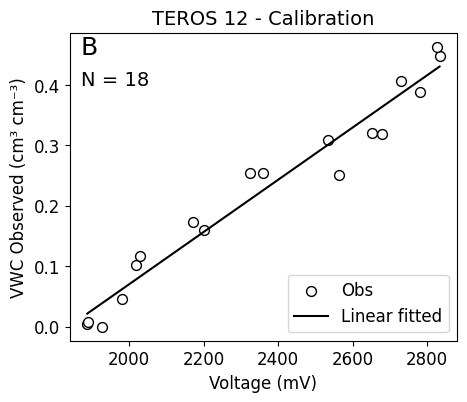

In [29]:
# Create figure
fontsize=12

plt.figure(figsize=(5,4))
plt.title('TEROS 12 - Calibration', size=14)
plt.scatter(df['raw_voltage'], df['vwc_obs'], facecolor='w', edgecolor='k', s=50, label='Obs')
plt.plot(x_pred, y_pred, color='black', label='Fitted')
plt.xlabel('Voltage (mV)', size=fontsize)
plt.ylabel('VWC Observed (cm³ cm⁻³)', size=fontsize)
plt.yticks(size=fontsize)
plt.xticks(size=fontsize)
plt.text(1870, 0.45, 'B',size=18)
plt.text(1870, 0.40,'N = 18', fontsize=14)
plt.legend(fontsize=fontsize, loc = 'lower right')
plt.show()